In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from sklearn import datasets
import pandas as pd
boston_load = datasets.load_boston() 
boston = pd.DataFrame(boston_load.data, columns=boston_load.feature_names)
boston['MEDV'] = boston_load.target

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# initially somevalues in CRIM are on a scale of 0-100 while others are 0-1
# standardises CRIM rate so everything is between 0-1

unstandardised=[ i for i in boston['CRIM'] if i >1]
standardised=[i/100 for i in unstandardised]
boston['CRIM']=boston['CRIM'].replace(unstandardised,standardised)

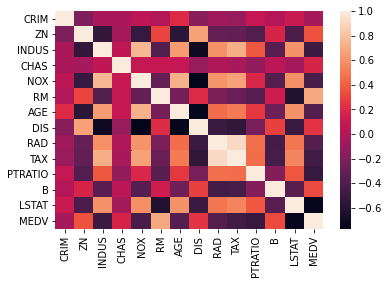

In [5]:
correlation=boston.corr()
sns.heatmap(correlation)
plt.show()
# shows the correlation between variables as a heatmap

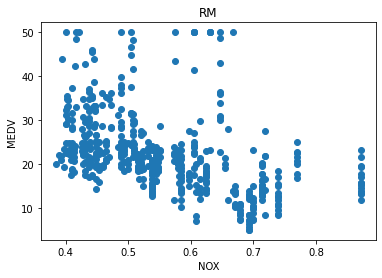

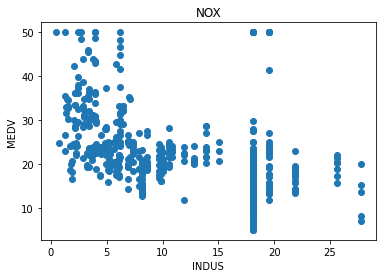

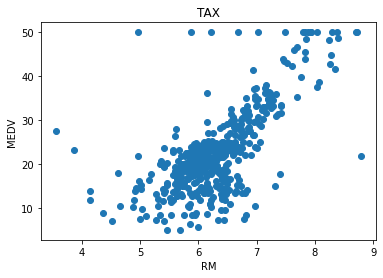

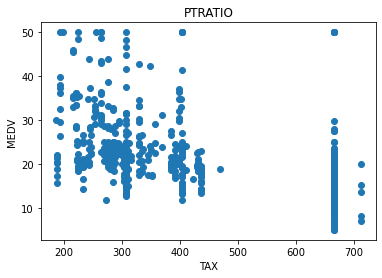

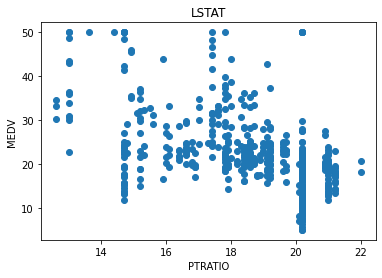

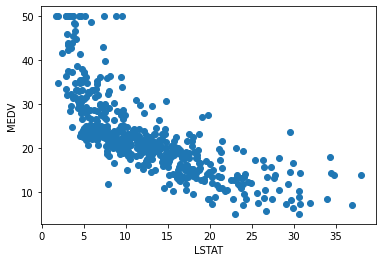

In [6]:
#this cell lets you create scatter plots
#it is easy to change the axes if you want to plot other variables
# var:  the y axis, default MEDV
# tolerance: varaibles with correlation greater or equal to this varaible 
# are plotted, set to 0 if you want to plot everything

var='MEDV'
tolerance=0.4
#create a list of variables to plot
plot_list=[i for i in boston.columns if abs(correlation[var][i])>=tolerance and i!=var]
l=len(plot_list)

count=0
for i in plot_list:
    plt.title(i)
    plt.figure(count)
    plt.scatter(boston[i],boston[var])
    plt.ylabel(var)
    plt.xlabel(i)
    count+=1

plt.show()

In [7]:
# we see RM and LSTAT are approximately linearly related to MEDV
# note that there seems to be vertical lines in the other plots
# In the code below I tried to group similar x-values together to eliminate the 
#lines but it doesnt work well

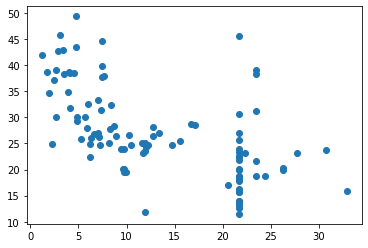

In [8]:
variable='INDUS'
y='MEDV'
num=100

sorted_boston=boston.sort_values(variable)
big_var=[]
big_y=[]
for i in range(101):
    avg=0
    
    for j in sorted_boston[variable][5*i:5*i+6]:
        avg+=j
    big_var.append(avg/5)
    avg=0
    for j in sorted_boston[y][5*i:5*i+6]:
        avg+=j
    big_y.append(avg/5)
big_y.append(sorted_boston[y][505])
big_var.append(sorted_boston[var][505])
plt.scatter(big_var,big_y)

         Component  Explained Variance Ratio
0  PCA Component 1                  0.806689
1  PCA Component 2                  0.163360
2  PCA Component 3                  0.021387
3  PCA Component 4                  0.006966
4  PCA Component 5                  0.000748
9         TAX
11          B
6         AGE
8         RAD
1          ZN
2       INDUS
12      LSTAT
7         DIS
10    PTRATIO
5          RM
4         NOX
Name: Variable Names, dtype: object


Text(0, 0.5, 'PCA Component 2')

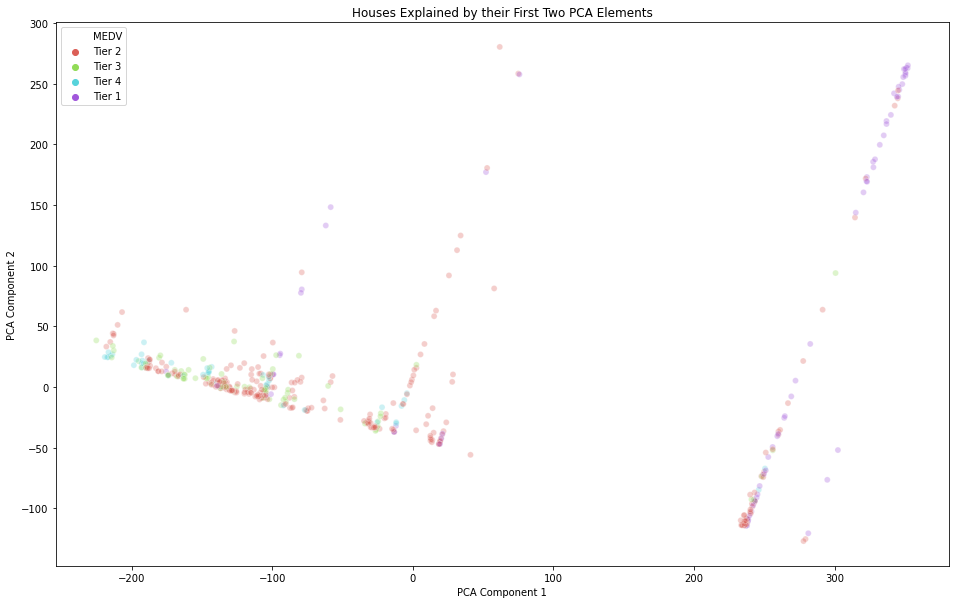

In [9]:
from sklearn.decomposition import PCA
def pca_dec(data, n):
     
    pca = PCA(n)
    X_dec = pca.fit_transform(data)
    return X_dec, pca

#Decomposing the housing price set:
pca_boston_results, pca_boston = pca_dec(boston.iloc[:,:13], 5)




names_pcas = [f"PCA Component {i}" for i in range(1, 6, 1)]
k = pd.DataFrame(list(zip(names_pcas, pca_boston.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(k)

#Sorting the values of the first principal component 
df = pd.DataFrame({'PCA':pca_boston.components_[0], 'Variable Names':list(boston.iloc[:,:13])})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
print(df2['Variable Names'][0:11])

df.head()
def color_coder(sale_price):
    if sale_price <=15:
        return "Tier 1"
    elif sale_price <=25:
        return "Tier 2"
    elif sale_price <=35:
        return "Tier 3"
    elif sale_price <= 50:
        return "Tier 4"

y_tiers = boston['MEDV'].apply(color_coder)  
import seaborn as sns
import matplotlib.pyplot as plt

x1 = pca_boston_results[:,0] 
#Taking the first PCA component for each decomposed house's data

y1 = pca_boston_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x1, y=y1,
    hue=y_tiers,
    palette=sns.color_palette("hls",4),
    legend="full",
    alpha=0.3
)

plt.title("Houses Explained by their First Two PCA Elements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")



(3.0, 10.0)

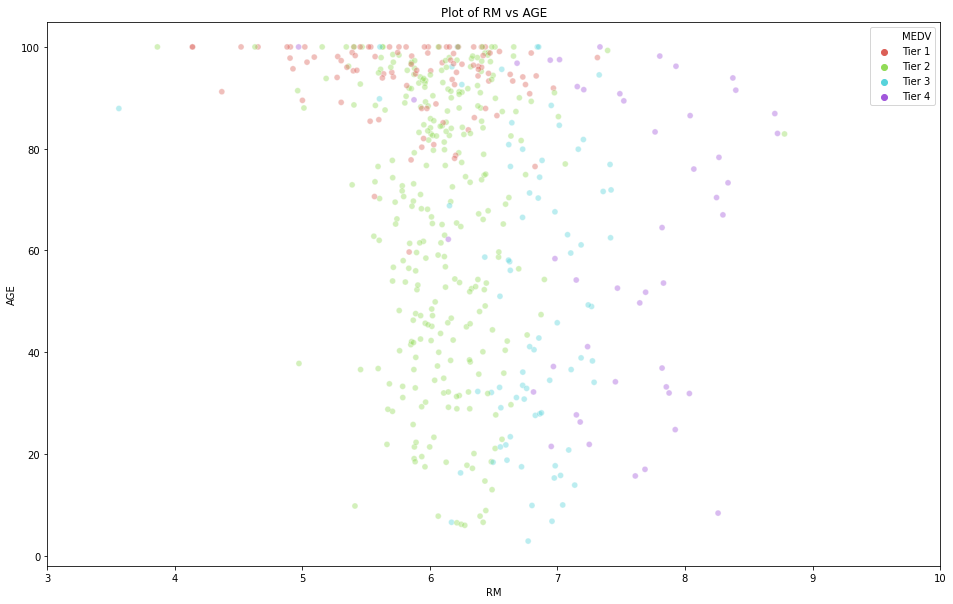

In [10]:
y_tiers = boston['MEDV'].apply(color_coder).sort_values()
y_tiers_col = boston['MEDV'].apply(color_coder)
boston['y_tiers'] = y_tiers_col
plt.figure(figsize=(16,10))
plt.title('Plot of RM vs AGE')
sns.scatterplot(
    x=boston['RM'], y=boston['AGE'],
    hue=y_tiers,
    hue_order = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],
    palette=sns.color_palette("hls",4),
    legend="full",
    alpha=0.4
)
plt.xlim([3,10])


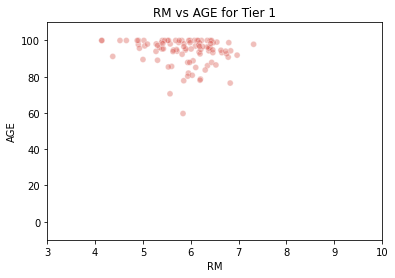

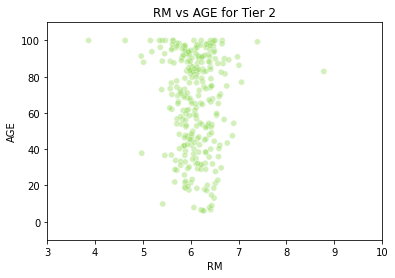

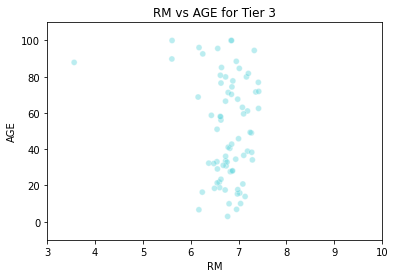

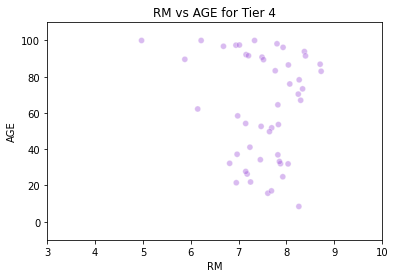

In [13]:

for i in range(1,5):
    tier = 'Tier ' + str(i)
    temp1 = boston[boston['y_tiers'] == tier]
    my_x = temp1['RM']
    sns.scatterplot(
        x=my_x, y=boston['AGE'],
        hue = y_tiers,
        hue_order = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],
        legend = False,
        palette=sns.color_palette("hls",4),
        alpha=0.4)
    plt.ylim([-10, 110])
    plt.xlim([3, 10])
    plt.title('RM vs AGE for ' + tier)
    plt.savefig("Graph_of_tier_"+str(i)+".png")
    plt.show()





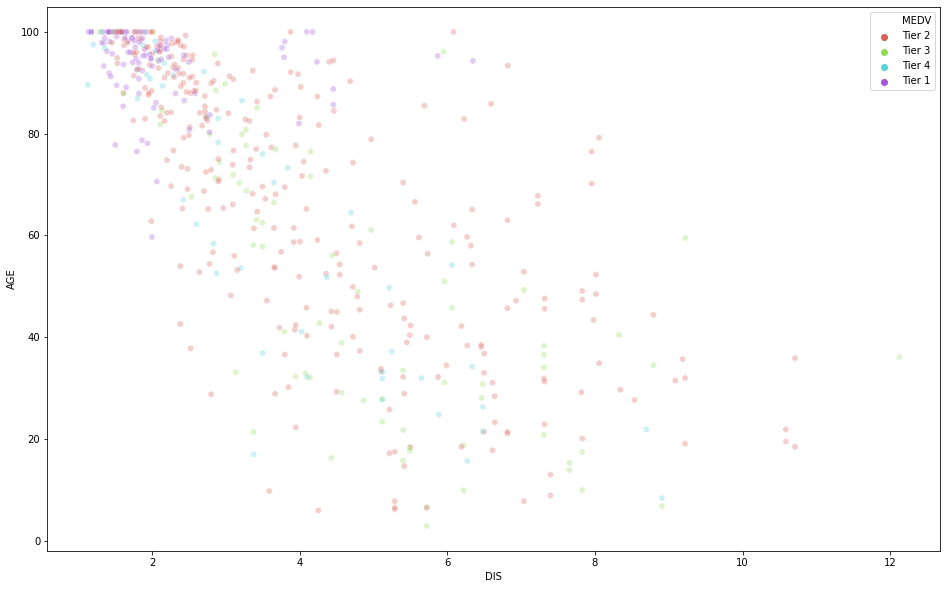

In [12]:
y_tiers = boston['MEDV'].apply(color_coder)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=boston['DIS'], y=boston['AGE'],
    hue=y_tiers,
    palette=sns.color_palette("hls",4),
    legend="full",
    alpha=0.3
)